In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
dmr_vals = pd.read_csv('../data/ref/human_dmrs_quantified.tsv', sep='\t', header=None).set_index(0)

In [36]:
dmrs = pd.read_csv('../data/outs/dmrs_final_annot.tsv', sep='\t').set_index('3')

In [37]:
entropy_vals = pd.read_csv('../data/outs/mcg_entropy_based_specificity.tsv').set_index('0')

In [38]:
dmrs['type_specificity'] = entropy_vals

In [39]:
dmrs.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,1.003260
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,0.104146
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,0.846085
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,1.016329
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,0.047807


In [51]:
(dmrs['primate_level1'] & ~dmrs['mammal_level1']).sum()

371964

In [52]:
(dmrs['mammal_level1'] &  dmrs['primate_level1']).sum()

0

In [53]:
dmrs['mammal_level1'].sum(), (dmrs['primate_level1'] & ~dmrs['mammal_level1']).sum()

(195435, 371964)

In [54]:
dmr_vals

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
human_orig_1,0.964286,0.750000,0.921348,0.958333,NaN,0.880000,0.666667,0.920000,1.000000,1.000000,1.000000,1.000000,0.861702,0.818182,0.840000,1.000000,1.000000,0.941176,0.972222,0.333333
human_orig_2,0.515385,0.692308,0.698225,0.741573,0.750000,0.630435,0.764706,0.783333,0.551724,0.696429,0.694915,0.750000,0.553903,0.515152,0.932203,0.937500,0.578947,0.712329,0.740260,0.653846
human_orig_3,0.421429,1.000000,0.779762,0.912500,1.000000,0.803922,0.333333,0.903226,0.482759,0.973684,0.716981,1.000000,0.719764,0.949153,0.985714,1.000000,0.941176,0.970588,0.721311,0.837838
human_orig_4,0.580645,1.000000,0.911765,1.000000,0.500000,0.928571,NaN,1.000000,1.000000,0.750000,0.550000,1.000000,0.625000,0.263158,0.923077,1.000000,1.000000,1.000000,0.695652,0.500000
human_orig_5,0.161677,0.571429,0.362587,0.390000,0.384615,0.449153,0.253521,0.587838,0.403846,0.602410,0.339286,0.323529,0.168026,0.110169,0.549020,0.290323,0.533333,0.655738,0.668449,0.362745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_orig_1361954,0.445378,0.730769,0.458204,0.489796,0.625000,0.525000,0.480769,0.442623,0.476190,0.439394,0.601449,0.625000,0.381651,0.388060,0.564516,0.416667,0.640000,0.350877,0.419643,0.460317
human_orig_1361955,0.500671,0.729730,0.587110,0.492105,0.357143,0.479508,0.561538,0.568562,0.475248,0.473684,0.717822,0.551282,0.432944,0.460094,0.476879,0.400000,0.466165,0.459155,0.496933,0.501672
human_orig_1361956,0.491525,0.562500,0.487603,0.605505,0.571429,0.604167,0.625000,0.648649,0.629630,0.344828,0.586957,0.500000,0.356962,0.512500,0.352941,0.352941,0.357143,0.494382,0.554348,0.446429


In [55]:
peaks = pd.read_csv('../../fig2/data/outputs/atac_levels/atac_summary_table.tsv', sep='\t')

In [56]:
peaks.head()

,shortname,0,1,2,3,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,...,mammal_level3,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate
0,chrX-154763146-154763645,chrX,154763146,154763645,VIP_peak_114413b,2.000056,False,False,False,False,...,False,False,CpG,532,DKC1,CpG,NaN,NaN,NaN,NaN
1,chr7-80334075-80334574,chr7,80334075,80334574,VIP_peak_99030c,2.000120,False,True,False,False,...,False,False,ERVL-B4-int|LTR|ERVL,40114,LOC101927269,ERVL,NaN,NaN,NaN,NaN
2,chr16-88340593-88341092,chr16,88340593,88341092,VIP_peak_42664,2.000145,False,False,False,False,...,False,False,Intergenic,-86628,ZNF469,Intergenic,NaN,NaN,NaN,NaN
3,chr14-99332084-99332583,chr14,99332084,99332583,L6_IT_CAR3_peak_27261,2.000176,True,False,False,False,...,False,False,Intergenic,-60137,BCL11B,Intergenic,NaN,NaN,NaN,NaN
4,chr11-4710143-4710642,chr11,4710143,4710642,PVALB_peak_18823,2.000194,False,True,False,False,...,False,False,Intergenic,-12540,OR51E2,Intergenic,NaN,NaN,NaN,NaN


In [57]:
intersected = pd.read_csv('../data/working/dmr_peak_intersect.bed',
                          sep='\t', header=None)

In [58]:
intersected.head()

,0,1,2,3,4,5,6,7,8
0,chr1,184163,184273,human_orig_12,chr1,183723,184222,VIP_peak_411,59
1,chr1,190757,191223,human_orig_14,chr1,191205,191704,OPC_peak_282c,18
2,chr1,191264,191307,human_orig_15,chr1,191205,191704,OPC_peak_282c,43
3,chr1,191438,191806,human_orig_16,chr1,191205,191704,OPC_peak_282c,266
4,chr1,779651,780130,human_orig_48,chr1,779346,779845,L5_6_NP_peak_138,194


In [59]:
intersected[3].unique().shape

(347304,)

In [60]:
intersected.shape

(364934, 9)

In [61]:
intersected[7].unique().shape

(282602,)

In [62]:
dmrs.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,1.003260
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,0.104146
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,0.846085
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,1.016329
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,0.047807


In [92]:
intersected

,0,1,2,3,4,5,6,7,8
0,chr1,184163,184273,human_orig_12,chr1,183723,184222,VIP_peak_411,59
1,chr1,190757,191223,human_orig_14,chr1,191205,191704,OPC_peak_282c,18
2,chr1,191264,191307,human_orig_15,chr1,191205,191704,OPC_peak_282c,43
3,chr1,191438,191806,human_orig_16,chr1,191205,191704,OPC_peak_282c,266
4,chr1,779651,780130,human_orig_48,chr1,779346,779845,L5_6_NP_peak_138,194
...,...,...,...,...,...,...,...,...,...
364929,chrY,26373079,26373277,human_orig_1361907,chrY,26373251,26373750,L6_IT_CAR3_peak_91709,26
364930,chrY,26511057,26511366,human_orig_1361922,chrY,26511056,26511555,L6_CT_peak_132983,309
364931,chrY,26648284,26648328,human_orig_1361947,chrY,26647889,26648388,SNCG_peak_58323,44
364932,chrY,26670112,26670156,human_orig_1361948,chrY,26669741,26670240,L6_IT_peak_126247b,44


In [95]:
intersected[3].unique().shape

(347304,)

In [ ]:
intersected['human_specific'] = peaks.loc[

In [98]:
peaks = peaks.set_index('3')

In [141]:
intersected['distal'] = [peaks.loc[i,  'nearest_tss_dist'] > 1000 for i in intersected[7]]

In [143]:
intersected = intersected.loc[intersected.distal]

In [144]:
intersected['human_specific'] = [peaks.loc[i, 'human_specific_sequence'] for i in intersected[7]]

/tmp/ipykernel_232818/565030148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['human_specific'] = [peaks.loc[i, 'human_specific_sequence'] for i in intersected[7]]


In [145]:
intersected['mammal_level1'] = [peaks.loc[i, 'level1_mammal'] for i in intersected[7]]

/tmp/ipykernel_232818/963938512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['mammal_level1'] = [peaks.loc[i, 'level1_mammal'] for i in intersected[7]]


In [146]:
intersected['mammal_level2'] = [peaks.loc[i, 'mammal_level2'] for i in intersected[7]]

/tmp/ipykernel_232818/4101145312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['mammal_level2'] = [peaks.loc[i, 'mammal_level2'] for i in intersected[7]]


In [147]:
intersected['mammal_level3'] = [peaks.loc[i, 'mammal_level3'] for i in intersected[7]]

/tmp/ipykernel_232818/3876381351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['mammal_level3'] = [peaks.loc[i, 'mammal_level3'] for i in intersected[7]]


In [148]:
intersected['mammal_level0'] = [peaks.loc[i, 'mammal_level0'] for i in intersected[7]]

/tmp/ipykernel_232818/2606955486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['mammal_level0'] = [peaks.loc[i, 'mammal_level0'] for i in intersected[7]]


In [149]:
min_dna_m = dmr_vals.min(axis=1)

In [150]:
intersected['min_m'] = [min_dna_m.loc[i] for i in intersected[3]]

/tmp/ipykernel_232818/3577516146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['min_m'] = [min_dna_m.loc[i] for i in intersected[3]]


In [151]:
biased_peaks = open('/storage/data/atac_reprocess/processed/da_peak_list/human_4fold/human_up/all_biased.txt', 'r').read().split('\n')

In [152]:
np.unique(biased_peaks)

array(['', 'chr1-10001023-10001522', 'chr1-100035137-100035636', ...,
       'chrX-99673843-99674342', 'chrX-9986686-9987185',
       'chrY-13337552-13338051'], dtype='<U25')

In [153]:
peaks['human_biased'] = peaks.shortname.isin(biased_peaks)

In [154]:
intersected['biased_peaks'] = [peaks.loc[i, 'human_biased'] for i in intersected[7]]

/tmp/ipykernel_232818/3249252580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['biased_peaks'] = [peaks.loc[i, 'human_biased'] for i in intersected[7]]


In [155]:
def save_list(outfile, listlike):
    '''
    writes a file as a newline seperated list, useful for gsea, or storing information in general
    
    args:
        outfile : a file path to write a list of genes
        listline : an interatable object like a python list, or a numpy array
    
    '''
    return open(outfile, 'w').write(''.join([str(i) + '\n' for i in listlike]))

In [156]:
intersected['all'] = intersected.index.isin(intersected.index)

/tmp/ipykernel_232818/4149023437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intersected['all'] = intersected.index.isin(intersected.index)


In [157]:
out_path = '../data/cg_level_by_level/{}_methylation_levels'
levels = ['human_specific', 'mammal_level1', 'all', 'mammal_level2', 'mammal_level3', 'mammal_level0', 'biased_peaks']

In [158]:
for level in levels:
    save_list(out_path.format(level), intersected.loc[intersected[level], 'min_m'].values)

In [159]:
intersected.shape

(207356, 18)

In [96]:
intersected.shape

(364934, 9)

In [64]:
peaks_intersected.shape

(282602, 68)

In [65]:
dmrs_intersected = dmrs.loc[dmrs.index.isin(intersected[3])]

In [66]:
dmrs_intersected.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_12,chr1,184163,184273,False,False,False,False,False,False,False,...,False,"non-coding (NR_148357, exon 3 of 3)",1830,LOC102725121,exon,False,False,NaN,NaN,0.263909
human_orig_14,chr1,190757,191223,False,False,False,False,False,False,False,...,False,Intergenic,-3032,MIR6859-2,Intergenic,False,False,NaN,NaN,0.557138
human_orig_15,chr1,191264,191307,False,False,False,False,False,False,False,...,False,Intergenic,-3328,MIR6859-2,Intergenic,False,False,NaN,NaN,0.773638
human_orig_16,chr1,191438,191806,False,False,False,False,False,False,False,...,False,Intergenic,-3664,MIR6859-2,Intergenic,False,False,NaN,NaN,0.655164
human_orig_48,chr1,779651,780130,False,False,False,False,False,False,False,...,False,AluJb|SINE|Alu,-1203,LOC100288069,Alu,False,False,NaN,NaN,0.134676


In [67]:
dmrs_intersected['human_specific'].sum()

5208

In [74]:
intersected_specific = dmrs_intersected.index[dmrs_intersected.human_specific]

In [77]:
not_specific = dmrs_intersected.index[~dmrs_intersected.human_specific]

In [78]:
import seaborn as sns

Text(0.5, 1.0, 'DMRs intersecting ATAC peaks')

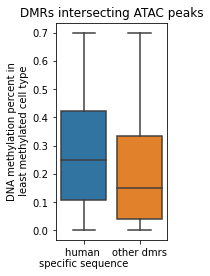

In [90]:
fig, ax = plt.subplots(figsize=(2, 4))
sns.boxplot([dmr_vals.loc[intersected_specific].min(axis=1), dmr_vals.loc[not_specific].min(axis=1)], ax=ax)
ax.set_ylabel('DNA methylation percent in\n least methylated cell type')
ax.set_xticks([0, 1], labels=['human \nspecific sequence', 'other dmrs'])
ax.set_title('DMRs intersecting ATAC peaks')

In [85]:
from scipy.stats import ttest_ind

In [86]:
ttest_ind(dmr_vals.loc[intersected_specific].min(axis=1), dmr_vals.loc[not_specific].min(axis=1))

Ttest_indResult(statistic=25.694344033942436, pvalue=1.8513419460652124e-145)

In [26]:
peaks_intersected.head()

,shortname,0,1,2,3,4,human_specific_sequence,mammal_level0,primate_level0,level1_macaque,...,mammal_level3,primate_level3,homer_annot,nearest_tss_dist,nearest_gene_name,simple_annot,conservation_idx,divergence_idx,conservation_idx_primate,divergence_idx_primate
3,chr14-99332084-99332583,chr14,99332084,99332583,L6_IT_CAR3_peak_27261,2.000176,True,False,False,False,...,False,False,Intergenic,-60137,BCL11B,Intergenic,NaN,NaN,NaN,NaN
8,chr2-141688301-141688800,chr2,141688301,141688800,PVALB_peak_65193,2.000194,False,False,False,False,...,False,False,MIR|SINE|MIR,443150,LRP1B,MIR,NaN,NaN,NaN,NaN
9,chr4-182655714-182656213,chr4,182655714,182656213,PVALB_peak_92442,2.000194,False,True,False,False,...,False,False,MER112|DNA|hAT-Charlie,261289,DCTD,hAT-Charlie,NaN,NaN,NaN,NaN
10,chr5-160903661-160904160,chr5,160903661,160904160,PVALB_peak_99311b,2.000194,False,False,True,False,...,False,False,Intergenic,34715,LINC02159,Intergenic,1.508916,0.484649,1.508916,0.484649
11,chr6-147782255-147782754,chr6,147782255,147782754,PVALB_peak_106096,2.000194,False,True,False,True,...,False,False,Intergenic,273815,SAMD5,Intergenic,2.055899,0.863021,1.757184,0.842587


In [27]:
peaks_intersected['human_specific_sequence'].sum()

4146

In [28]:
dmrs_intersected

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_12,chr1,184163,184273,False,False,False,False,False,False,False,...,False,"non-coding (NR_148357, exon 3 of 3)",1830,LOC102725121,exon,False,False,NaN,NaN,0.263909
human_orig_14,chr1,190757,191223,False,False,False,False,False,False,False,...,False,Intergenic,-3032,MIR6859-2,Intergenic,False,False,NaN,NaN,0.557138
human_orig_15,chr1,191264,191307,False,False,False,False,False,False,False,...,False,Intergenic,-3328,MIR6859-2,Intergenic,False,False,NaN,NaN,0.773638
human_orig_16,chr1,191438,191806,False,False,False,False,False,False,False,...,False,Intergenic,-3664,MIR6859-2,Intergenic,False,False,NaN,NaN,0.655164
human_orig_48,chr1,779651,780130,False,False,False,False,False,False,False,...,False,AluJb|SINE|Alu,-1203,LOC100288069,Alu,False,False,NaN,NaN,0.134676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_orig_1361907,chrY,26373079,26373277,False,False,False,False,False,False,False,...,False,Intergenic,644688,TTTY3,Intergenic,False,False,NaN,NaN,0.142536
human_orig_1361922,chrY,26511057,26511366,False,False,False,False,False,False,False,...,False,Intergenic,782722,TTTY3,Intergenic,False,False,NaN,NaN,0.093928
human_orig_1361947,chrY,26648284,26648328,False,False,True,False,False,False,False,...,False,(AATGG)n|Simple_repeat|Simple_repeat,919816,TTTY3,Simple_repeat,False,False,NaN,NaN,0.115525


In [29]:
peak_dmr_specific = dmrs_intersected.index[dmrs_intersected['human_specific']]

In [30]:
spec_overlap = dmrs.loc[peak_dmr_specific]
no_overlap = dmrs.loc[~dmrs.index.isin(peak_dmr_specific) & dmrs.human_specific]

In [31]:
from seaborn import kdeplot

In [32]:
dmrs.head()

,chrm,start,end,mammal_level0,primate_level0,human_specific,macaque_level1,marmoset_level1,mouse_level1,mammal_level1,...,primate_level2,homer_annot,tss_dist,gene_name,simple_annot,mammal_level3,primate_level3,conservation_idx,conservation_idx_primate,type_specificity
3,,,,,,,,,,,,,,,,,,,,,
human_orig_1,chr1,14699,14710,False,False,False,False,False,False,False,...,False,TTS (NR_046018),2731,MIR6859-4,TTS,False,False,NaN,NaN,1.003260
human_orig_2,chr1,54489,54649,False,False,False,False,False,False,False,...,False,L2|LINE|L2,-14522,OR4F5,L2,False,False,NaN,NaN,0.104146
human_orig_3,chr1,56298,56305,False,False,False,False,False,False,False,...,False,Intergenic,-12789,OR4F5,Intergenic,False,False,NaN,NaN,0.846085
human_orig_4,chr1,87723,87754,False,False,False,False,False,False,False,...,False,Intergenic,18648,OR4F5,Intergenic,False,False,NaN,NaN,1.016329
human_orig_5,chr1,91059,91550,False,False,False,False,False,False,False,...,False,Intergenic,22214,OR4F5,Intergenic,False,False,NaN,NaN,0.047807


(0.0, 1.5)

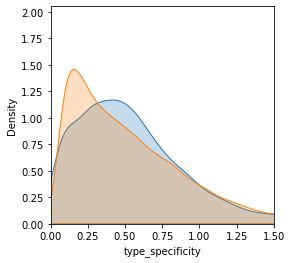

In [33]:
fig, ax = plt.subplots(figsize=(4,4))
kdeplot(spec_overlap.type_specificity, ax=ax, label='human specific sequence dmr with atac peak', fill=True)
kdeplot(no_overlap.type_specificity, ax=ax, label='human specific sequence dmr with no atac peak', fill=True)
# kdeplot(dmrs.type_specificity, ax = ax, label='all dmrs')
ax.set_ylim(0, 2.05)
ax.set_xlim(0, 1.5)
# ax.legend()

In [36]:
from scipy.stats import ttest_ind

In [39]:
ttest_ind(spec_overlap.type_specificity, no_overlap.type_specificity, alternative='greater')

Ttest_indResult(statistic=1.3656537889178635, pvalue=0.08602662872649781)

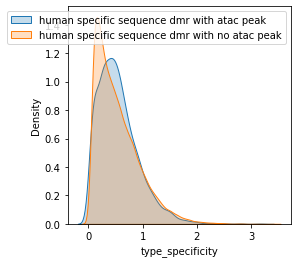

In [34]:
fig, ax = plt.subplots(figsize=(4,4))
kdeplot(spec_overlap.type_specificity, ax=ax, label='human specific sequence dmr with atac peak', fill=True)
kdeplot(no_overlap.type_specificity, ax=ax, label='human specific sequence dmr with no atac peak', fill=True)
# kdeplot(dmrs.type_specificity, ax = ax, label='all dmrs')
ax.legend()

In [42]:
def annotate_tes(annot_string):
    if 'LTR' in annot_string:
        return 'LTR'
    if 'LINE' in annot_string:
        return 'LINE'
    if 'SINE' in annot_string:
        return 'SINE'
    if 'DNA' in annot_string:
        return 'DNA'
    else:
        return 'not_te'
    return annot_string

In [43]:
no_overlap.homer_annot.head()

3
human_orig_7         AluY|SINE|Alu
human_orig_29           Intergenic
human_orig_37     LTR22C2|LTR|ERVK
human_orig_38    L1PA15-16|LINE|L1
human_orig_39        L1PA7|LINE|L1
Name: homer_annot, dtype: object

In [44]:
no_overlap = no_overlap.copy()
spec_overlap = spec_overlap.copy()

In [45]:
no_overlap['te'] = [annotate_tes(i) for i in no_overlap.homer_annot]

In [46]:
spec_overlap['te'] = [annotate_tes(i) for i in spec_overlap.homer_annot]

In [47]:
def fix_pie(to_plot,  min_percent=2):
    new_vals = {}
    new_vals['other'] = 0
    size = to_plot.sum()
    for idx in to_plot.index:
        val = to_plot[idx]
        if idx =='promoter':
            new_vals[idx] = val
        elif val/size * 100 < min_percent:
            new_vals['other'] += val
        else:
            new_vals[idx] = val
    return pd.Series(new_vals)

In [48]:
a = fix_pie(no_overlap.simple_annot.value_counts())

In [49]:
a

other          4790
L1            15333
centr         10886
ERV1           6622
Alu            6307
ERVK           2336
Intergenic     1903
ERVL-MaLR      1252
promoter        192
dtype: int64

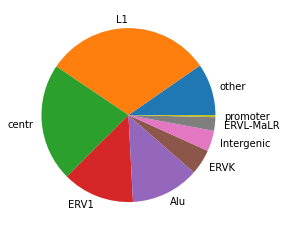

In [50]:
_ = plt.pie(a.values, labels=a.index)

In [51]:
no_overlap.shape

(49621, 65)

In [52]:
spec_overlap.shape

(5208, 65)

In [53]:
a = fix_pie(spec_overlap.simple_annot.value_counts())

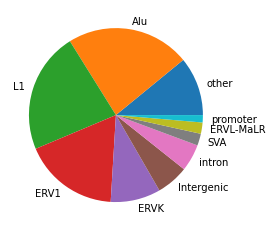

In [69]:
_ = plt.pie(a.values, labels=a.index)

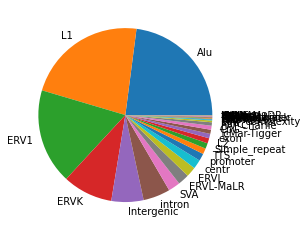

In [56]:
_ = plt.pie(spec_overlap.simple_annot.value_counts(), labels= spec_overlap.simple_annot.value_counts().index)

In [40]:
no_overlap.simple_annot.value_counts()

L1                15333
centr             10886
ERV1               6622
Alu                6307
ERVK               2336
Intergenic         1903
ERVL-MaLR          1252
ERVL                898
intron              854
SVA                 665
Simple_repeat       469
TcMar-Tigger        344
L2                  315
Satellite           296
promoter            192
hAT-Charlie         191
TTS                 174
exon                150
MIR                 116
CpG                  67
Low_complexity       62
TcMar-Mariner        33
hAT-Tip100           29
CR1                  17
PiggyBac             16
uncertain            16
telo                 13
snRNA                12
hAT-Blackjack        12
tRNA                  8
MULE-MuDR             4
srpRNA                4
rRNA                  3
RTE-X                 3
Gypsy                 3
LTR                   3
RTE-BovB              3
TcMar-Tc2             2
RNA                   2
hAT-Ac                1
scRNA                 1
tRNA-RTE        

<AxesSubplot:xlabel='type_specificity', ylabel='Density'>

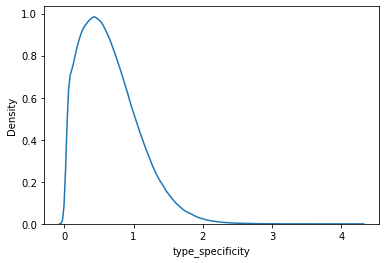

In [31]:
kdeplot(dmrs.type_specificity)

In [39]:
no_overlap.type_specificity

3
human_orig_7         NaN
human_orig_29        NaN
human_orig_37        NaN
human_orig_38        NaN
human_orig_39        NaN
                      ..
human_orig_1361950   NaN
human_orig_1361951   NaN
human_orig_1361952   NaN
human_orig_1361953   NaN
human_orig_1361954   NaN
Name: type_specificity, Length: 49621, dtype: float64

In [84]:
n_type = """   46 human_ASC.bed
   11 human_ChC.bed
   12 human_Endo.bed
   16 human_L2_3_IT.bed
   26 human_L4_5_IT.bed
    9 human_L5_6_NP.bed
   75 human_L5_ET.bed
   69 human_L5_IT.bed
    5 human_L6b.bed
    9 human_L6_CT.bed
   15 human_L6_IT.bed
    7 human_L6_IT_CAR3.bed
   14 human_LAMP5.bed
   53 human_MGC.bed
  111 human_ODC.bed
   15 human_OPC.bed
   11 human_PVALB.bed
    1 human_SNCG.bed
    6 human_SST.bed
    9 human_VIP.bed
   16 human_VLMC.bed"""

In [85]:
n_type = n_type.split('\n')

In [86]:
n_type = [i.strip(' ') for i in n_type]
n_type = {i.split(' ')[1] : int(i.split(' ')[0]) for i in n_type}

Text(0, 0.5, 'N human specific peaks')

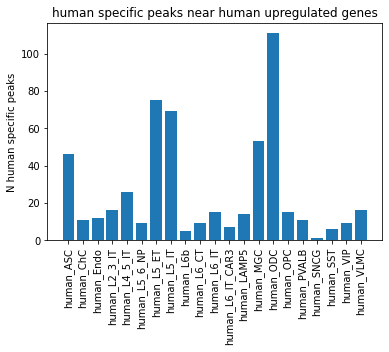

In [96]:
plt.bar(np.arange(len(n_type)), [i for i in n_type.values()])

_ = plt.xticks(np.arange(len(n_type)), labels = [i.split('.bed')[0] for i in n_type], rotation=90)
plt.title('human specific peaks near human upregulated genes')
plt.ylabel('N human specific peaks')

In [79]:
n_type

{'46': 'human_ASC.bed',
 '11': 'human_PVALB.bed',
 '12': 'human_Endo.bed',
 '16': 'human_VLMC.bed',
 '26': 'human_L4_5_IT.bed',
 '9': 'human_VIP.bed',
 '75': 'human_L5_ET.bed',
 '69': 'human_L5_IT.bed',
 '5': 'human_L6b.bed',
 '15': 'human_OPC.bed',
 '7': 'human_L6_IT_CAR3.bed',
 '14': 'human_LAMP5.bed',
 '53': 'human_MGC.bed',
 '111': 'human_ODC.bed',
 '1': 'human_SNCG.bed',
 '6': 'human_SST.bed'}